# Predicting passenger survival on Titanic
## Logistic Regression with Python

For this we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in machine learning! 

We'll be trying to predict a classification- survival or deceased.
Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning.

## Import Libraries
Let's import some libraries to get started!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### The Data
Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [35]:
df_titanic = pd.read_csv('titanic_train.csv')

In [36]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Adding a new column for the title of a person which can be used as a feature.**

In [37]:
df_titanic['Name Title'] = df_titanic['Name'].apply(lambda x:x.split(', ')[1].split('.')[0])
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [38]:
df_titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [39]:
df_titanic['Name Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Lady              1
Sir               1
Ms                1
the Countess      1
Mme               1
Capt              1
Don               1
Jonkheer          1
Name: Name Title, dtype: int64

### Exploratory Data Analysis
Let's begin some exploratory data analysis! We'll start by checking out missing data!

### Missing Data
We can use seaborn to create a simple heatmap to see where we are missing data!

<AxesSubplot:>

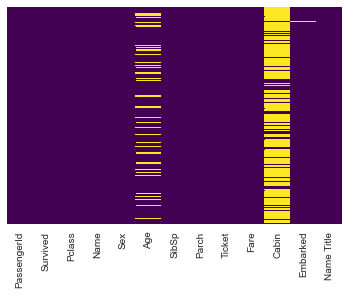

In [40]:
sns.heatmap(df_titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! 

<AxesSubplot:xlabel='Survived', ylabel='count'>

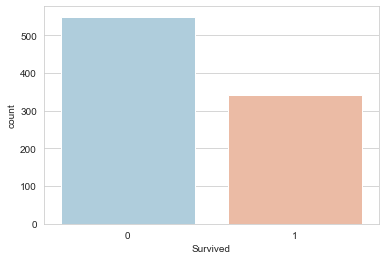

In [41]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df_titanic, palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

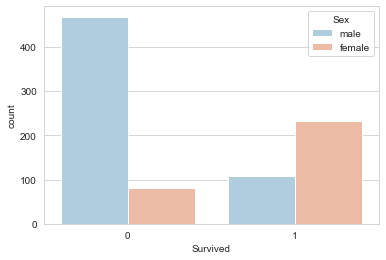

In [42]:
sns.countplot(x='Survived', data=df_titanic, hue='Sex', palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

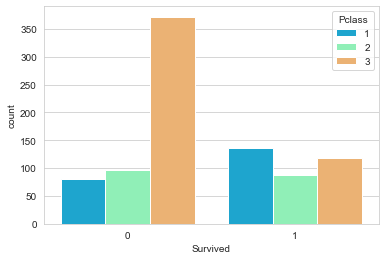

In [43]:
sns.countplot(x='Survived', data=df_titanic, hue='Pclass', palette='rainbow')

<AxesSubplot:>

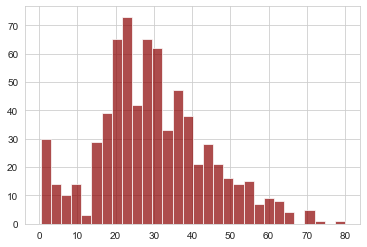

In [44]:
df_titanic['Age'].hist(bins=30, color='darkred', alpha=0.7)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

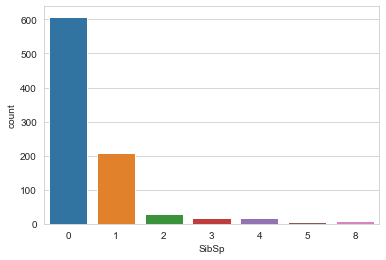

In [45]:
sns.countplot(x='SibSp', data=df_titanic) #Sibling/Spouse

<AxesSubplot:xlabel='SibSp', ylabel='count'>

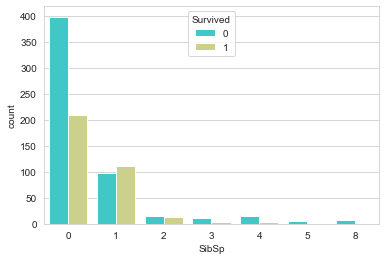

In [46]:
sns.countplot(x='SibSp', data=df_titanic, hue='Survived', palette='rainbow')

<AxesSubplot:>

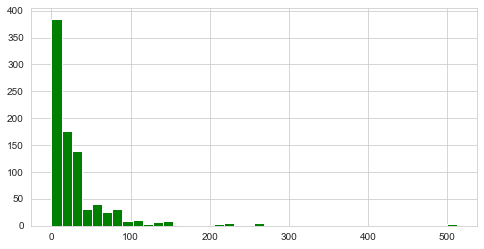

In [47]:
df_titanic['Fare'].hist(color='green', bins=40, figsize=(8,4))

<AxesSubplot:xlabel='Name Title', ylabel='count'>

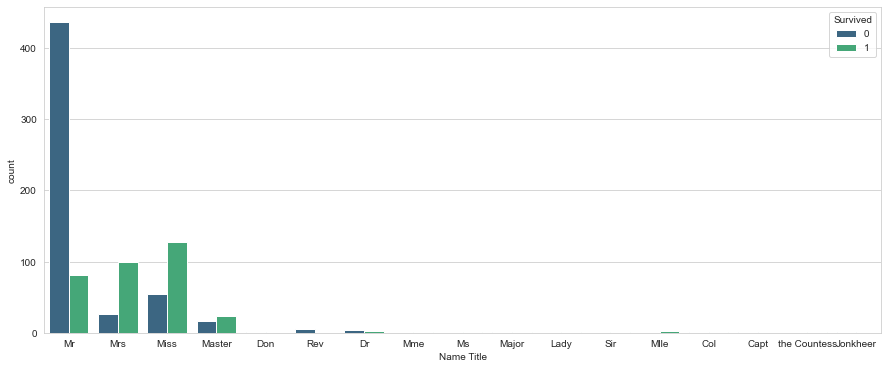

In [48]:
plt.figure(figsize=(15,6))
sns.countplot(x='Name Title',data=df_titanic,hue='Survived',palette='viridis')

### Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers. However we can check the average age by passenger class. For example:

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

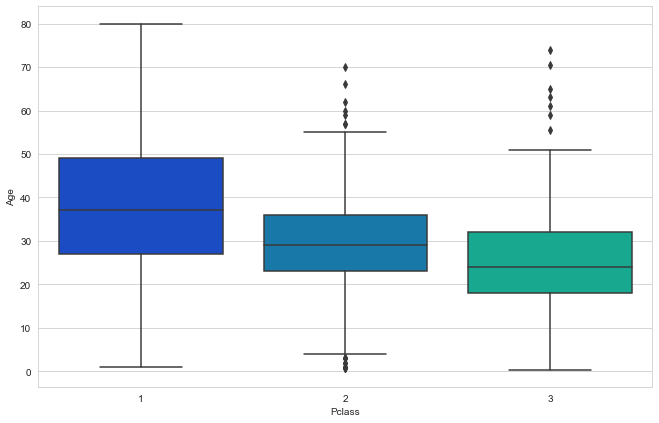

In [49]:
plt.figure(figsize=(11,7))
sns.boxplot(x='Pclass', y='Age', data=df_titanic, palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [50]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [51]:
df_titanic['Age'] = df_titanic[['Age','Pclass']].apply(impute_age,axis=1)

**Now let's check that heat map again!**

<AxesSubplot:>

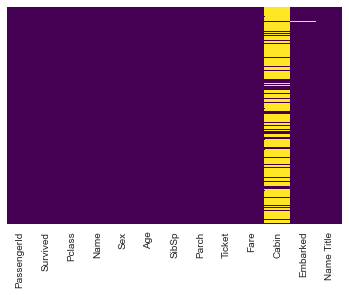

In [52]:
sns.heatmap(df_titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')

**Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.**

In [53]:
df_titanic.drop('Cabin', axis=1, inplace=True)

In [54]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


<AxesSubplot:>

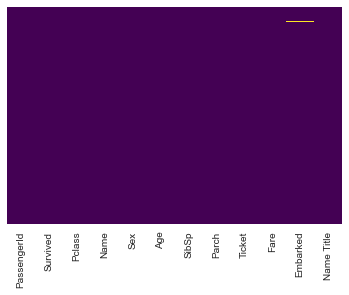

In [55]:
sns.heatmap(df_titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [56]:
df_titanic.dropna(inplace=True)

### Converting Categorical Features
We'll need to convert categorical features to dummy variables! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [57]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
 11  Name Title   889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


In [58]:
sex = pd.get_dummies(df_titanic['Sex'], drop_first=True)

In [59]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [60]:
embark = pd.get_dummies(df_titanic['Embarked'], drop_first=True)

In [61]:
name_title = pd.get_dummies(df_titanic['Name Title'], drop_first=True)

In [62]:
df_titanic.drop(['Sex','Embarked','Name','Name Title','Ticket'], axis=1, inplace=True)

In [63]:
df_titanic = pd.concat([df_titanic, sex, embark, name_title], axis=1)

In [64]:
df_titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,...,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
0,1,0,3,22.0,1,0,7.2500,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,2,1,1,38.0,1,0,71.2833,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,0,3,35.0,0,0,8.0500,1,0,1,...,0,0,0,0,1,0,0,0,0,0


Great! Our data is ready for our model!

## Building a Logistic Regression model
Let's start by splitting our data into a training set and test set.

## Train Test Split

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(df_titanic.drop('Survived', axis=1), df_titanic['Survived'], test_size=0.30, random_state=101)

## Training and Predicting

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
X_train.shape

(622, 25)

In [69]:
y_train.shape

(622,)

In [70]:
logmodel = LogisticRegression(max_iter=10000) #Setting max_iterations to avoid the warning that we get before:'Convergence warning'
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [71]:
logpredictions = logmodel.predict(X_test)

## Evaluation
We can check precision,recall,f1-score using classification report!

In [72]:
from sklearn.metrics import classification_report

In [73]:
print(classification_report(y_test, logpredictions))

              precision    recall  f1-score   support

           0       0.84      0.93      0.89       163
           1       0.87      0.73      0.80       104

    accuracy                           0.85       267
   macro avg       0.86      0.83      0.84       267
weighted avg       0.86      0.85      0.85       267

